mean +- standard error of mean of pollutants on day without fire, with fire and up to 5 days after fire outbreak


In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
import warnings

# Suppress RuntimeWarnings for invalid SEM calculations
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Dictionary of pollutants and their NetCDF file paths
pollutant_files = {
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Portugal.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Portugal.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Portugal.nc",
    "CO": r"D:\IPMA\CAMS\co_fire_Portugal.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Portugal.nc"
}

# Human-readable labels
label_names = {
    0: "No fire",
    1: "Day 0 (Fire outbreak)",
    2: "Day 1",
    3: "Day 2",
    4: "Day 3",
    5: "Day 4",
    6: "Day 5",
}

# Initialize results dictionary
results = { "Label": list(label_names.values()) }

# Loop over pollutants
for pollutant, filepath in pollutant_files.items():
    ds = xr.open_dataset(filepath)

    data = ds['Mean']  # pollutant values
    labels = ds['fire_label_Portugal'].transpose('latitude', 'longitude', 'time')

    mean_list, sem_list = [], []

    # Loop over fire labels
    for label in label_names.keys():
        mask = labels == label
        masked_data = data.where(mask)

        # Stats across time per grid cell
        mean = masked_data.mean(dim='time', skipna=True)
        std = masked_data.std(dim='time', skipna=True)
        count = masked_data.count(dim='time')
        sem = std / np.sqrt(count)

        # Spatial average
        mean_val = mean.mean(skipna=True).item()
        sem_val = sem.mean(skipna=True).item()

        # Convert CO mg/m³ → µg/m³
        if pollutant == "CO":
            mean_val *= 1000
            sem_val *= 1000    

        mean_list.append(mean_val)
        sem_list.append(sem_val)

    # Add columns for this pollutant
    results[f"{pollutant} Mean (µg/m³)"] = mean_list
    results[f"{pollutant} SEM (µg/m³)"] = sem_list

# Convert to DataFrame for pretty table
df = pd.DataFrame(results)

# Print the table
print("\nPollutant concentrations by fire label (spatial average across Portugal):")
print(df.to_string(index=False))


In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
import warnings

# Suppress RuntimeWarnings for invalid SEM calculations
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Dictionary of pollutants and their NetCDF file paths
pollutant_files = {
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Italy.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Italy.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Italy.nc",
    "CO": r"D:\IPMA\CAMS\co_fire_Italy.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Italy.nc"
}

# Human-readable labels
label_names = {
    0: "No fire",
    1: "Day 0 (Fire outbreak)",
    2: "Day 1",
    3: "Day 2",
    4: "Day 3",
    5: "Day 4",
    6: "Day 5",
}

# Initialize results dictionary
results = { "Label": list(label_names.values()) }

# Loop over pollutants
for pollutant, filepath in pollutant_files.items():
    ds = xr.open_dataset(filepath)

    data = ds['Mean']  # pollutant values
    labels = ds['fire_label_Italy'].transpose('latitude', 'longitude', 'time')

    mean_list, sem_list = [], []

    # Loop over fire labels
    for label in label_names.keys():
        mask = labels == label
        masked_data = data.where(mask)

        # Stats across time per grid cell
        mean = masked_data.mean(dim='time', skipna=True)
        std = masked_data.std(dim='time', skipna=True)
        count = masked_data.count(dim='time')
        sem = std / np.sqrt(count)

        # Spatial average
        mean_val = mean.mean(skipna=True).item()
        sem_val = sem.mean(skipna=True).item()

        # Convert CO mg/m³ → µg/m³
        if pollutant == "CO":
            mean_val *= 1000
            sem_val *= 1000

        mean_list.append(mean_val)
        sem_list.append(sem_val)

    # Add columns for this pollutant
    results[f"{pollutant} Mean (µg/m³)"] = mean_list
    results[f"{pollutant} SEM (µg/m³)"] = sem_list

# Convert to DataFrame for pretty table
df = pd.DataFrame(results)

# Print the table
print("\nPollutant concentrations by fire label (spatial average across Italy):")
print(df.to_string(index=False))


In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
import warnings

# Suppress RuntimeWarnings for invalid SEM calculations
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Dictionary of pollutants and their NetCDF file paths
pollutant_files = {
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Spain.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Spain.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Spain.nc",
    "CO": r"D:\IPMA\CAMS\co_fire_Spain.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Spain.nc"
}

# Human-readable labels
label_names = {
    0: "No fire",
    1: "Day 0 (Fire outbreak)",
    2: "Day 1",
    3: "Day 2",
    4: "Day 3",
    5: "Day 4",
    6: "Day 5",
}

# Initialize results dictionary
results = { "Label": list(label_names.values()) }

# Loop over pollutants
for pollutant, filepath in pollutant_files.items():
    ds = xr.open_dataset(filepath)

    data = ds['Mean']  # pollutant values
    labels = ds['fire_label_Spain'].transpose('latitude', 'longitude', 'time')

    mean_list, sem_list = [], []

    # Loop over fire labels
    for label in label_names.keys():
        mask = labels == label
        masked_data = data.where(mask)

        # Stats across time per grid cell
        mean = masked_data.mean(dim='time', skipna=True)
        std = masked_data.std(dim='time', skipna=True)
        count = masked_data.count(dim='time')
        sem = std / np.sqrt(count)

        # Spatial average
        mean_val = mean.mean(skipna=True).item()
        sem_val = sem.mean(skipna=True).item()

        # Convert CO mg/m³ → µg/m³
        if pollutant == "CO":
            mean_val *= 1000
            sem_val *= 1000

        mean_list.append(mean_val)
        sem_list.append(sem_val)

    # Add columns for this pollutant
    results[f"{pollutant} Mean (µg/m³)"] = mean_list
    results[f"{pollutant} SEM (µg/m³)"] = sem_list

# Convert to DataFrame for pretty table
df = pd.DataFrame(results)

# Print the table
print("\nPollutant concentrations by fire label (spatial average across Spain):")
print(df.to_string(index=False))


In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
import warnings

# Suppress RuntimeWarnings for invalid SEM calculations
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Dictionary of pollutants and their NetCDF file paths
pollutant_files = {
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Greece.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Greece.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Greece.nc",
    "CO": r"D:\IPMA\CAMS\co_fire_Greece.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Greece.nc"
}

# Human-readable labels
label_names = {
    0: "No fire",
    1: "Day 0 (Fire outbreak)",
    2: "Day 1",
    3: "Day 2",
    4: "Day 3",
    5: "Day 4",
    6: "Day 5",
}

# Initialize results dictionary
results = { "Label": list(label_names.values()) }

# Loop over pollutants
for pollutant, filepath in pollutant_files.items():
    ds = xr.open_dataset(filepath)

    data = ds['Mean']  # pollutant values
    labels = ds['fire_label_Greece'].transpose('latitude', 'longitude', 'time')

    mean_list, sem_list = [], []

    # Loop over fire labels
    for label in label_names.keys():
        mask = labels == label
        masked_data = data.where(mask)

        # Stats across time per grid cell
        mean = masked_data.mean(dim='time', skipna=True)
        std = masked_data.std(dim='time', skipna=True)
        count = masked_data.count(dim='time')
        sem = std / np.sqrt(count)

        # Spatial average
        mean_val = mean.mean(skipna=True).item()
        sem_val = sem.mean(skipna=True).item()

        # Convert CO mg/m³ → µg/m³
        if pollutant == "CO":
            mean_val *= 1000
            sem_val *= 1000

        mean_list.append(mean_val)
        sem_list.append(sem_val)

    # Add columns for this pollutant
    results[f"{pollutant} Mean (µg/m³)"] = mean_list
    results[f"{pollutant} SEM (µg/m³)"] = sem_list

# Convert to DataFrame for pretty table
df = pd.DataFrame(results)

# Print the table
print("\nPollutant concentrations by fire label (spatial average across Greece):")
print(df.to_string(index=False))


Divide daily concentrations of pollutants into quartiles Q1 (lowest), Q2, Q3 and Q4 (highest) for days when fires occurred and days they did not - Assess the impact of fire events on the concentration of air pollutants. Calculation of percentage of days (non-wildfire and wildfire) in each of the four qaurtiles

Splits pollutant concentrations into quartiles (25% intervals) separately for fire and no-fire cases:

Q1 = lowest 25%

Q2 = 25–50%

Q3 = 50–75%

Q4 = highest 25%

CO IS NOW IN THE SAME UNITS AS THE OTHER POLLUTANTS

In [5]:
import xarray as xr
import pandas as pd
import numpy as np

files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Portugal.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Portugal.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Portugal.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Portugal.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Portugal.nc"
}

fire_results = []
nofire_results = []
fire_ranges = []
nofire_ranges = []
fire_counts = []
nofire_counts = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    pollutant = ds["Mean"]
    fire_flag = ds["fire_binary_Portugal"]

    # Convert CO units
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = xr.Dataset({"pollutant": pollutant, "fire": fire_flag}).to_dataframe().reset_index()

    # --- FIRE DAYS ---
    df_fire = df[df["fire"] == 1].copy()
    df_fire_daily = (
        df_fire.groupby(df_fire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_fire_mean","pixel_count"]))
        .reset_index()
    )
    df_fire_daily["pollutant"] = pol_name
    fire_results.append(df_fire_daily)

    # Quartiles for fire days
    values = df_fire_daily["pollutant_fire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_fire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_fire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_fire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        fire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        fire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

    # --- NON-FIRE DAYS ---
    df_nofire = df[df["fire"] == 0].copy()
    df_nofire_daily = (
        df_nofire.groupby(df_nofire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_nofire_mean","pixel_count"]))
        .reset_index()
    )
    df_nofire_daily["pollutant"] = pol_name
    nofire_results.append(df_nofire_daily)

    # Quartiles for non-fire days
    values = df_nofire_daily["pollutant_nofire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_nofire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_nofire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_nofire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        nofire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        nofire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

# --- Combine results ---
fire_days_table = pd.concat(fire_results, ignore_index=True)
nofire_days_table = pd.concat(nofire_results, ignore_index=True)

fire_ranges_table = pd.DataFrame(fire_ranges)
nofire_ranges_table = pd.DataFrame(nofire_ranges)

fire_counts_table = pd.concat(fire_counts, ignore_index=True)
nofire_counts_table = pd.concat(nofire_counts, ignore_index=True)

print("\nFire days quartile ranges:")
print(fire_ranges_table)
print("\nNon-fire days quartile ranges:")
print(nofire_ranges_table)

print("\nFire days counts & percentages:")
print(fire_counts_table)
print("\nNon-fire days counts & percentages:")
print(nofire_counts_table)



Fire days quartile ranges:
  pollutant        min      Q1_cut      median      Q3_cut           max
0        CO  79.890615  162.723221  220.085429  342.843107  18765.392899
1     PM2.5   1.287711    9.214372   17.306115   35.084427   1031.491800
2      PM10   1.627074   13.339724   24.233247   48.764641   1353.121434
3       NO2   1.084791    4.959616    8.057715   12.552080    191.778204
4        NO   0.040122    0.217520    0.539270    2.492805    426.067570

Non-fire days quartile ranges:
  pollutant        min      Q1_cut      median      Q3_cut          max
0        CO  80.523754  134.016262  158.051344  187.555439  1939.176795
1     PM2.5   1.496552    5.984403    8.214316   11.666649   167.079925
2      PM10   2.187659    9.074594   12.509280   17.444711   228.303942
3       NO2   1.266539    3.743787    5.070246    6.732405    27.635693
4        NO   0.012126    0.165539    0.288293    0.614134    34.866279

Fire days counts & percentages:
   quartile  count pollutant  percent

Selected pixel with fire at latitude=36.750, longitude=-9.000


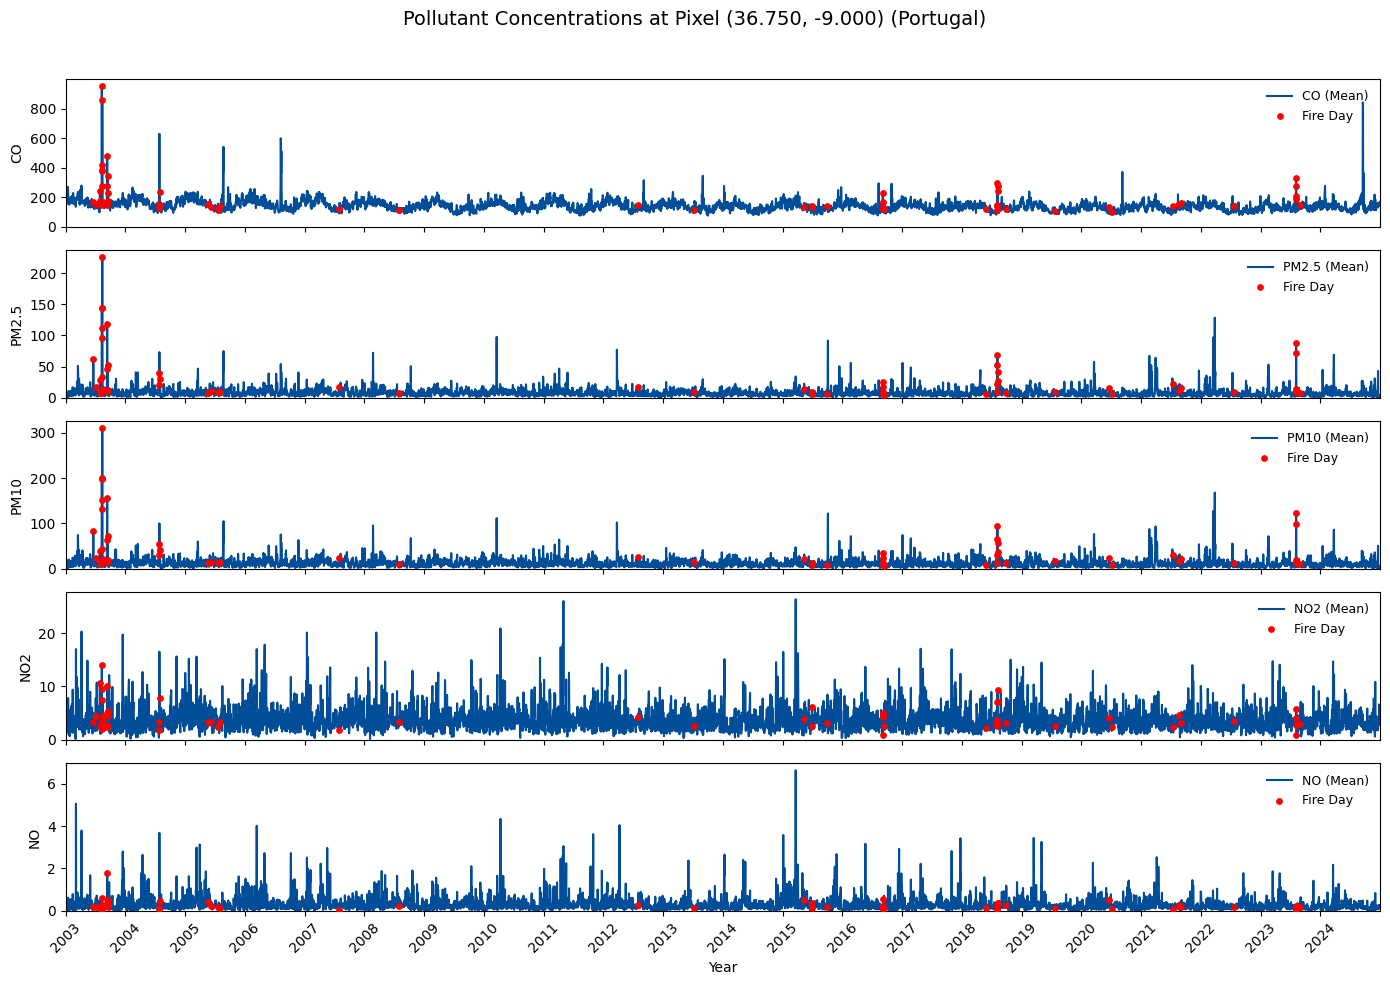

In [49]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Portugal.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Portugal.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Portugal.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Portugal.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Portugal.nc"
}

# --- STEP 1: Find one pixel that experienced fire ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Portugal"]

# Collapse over time to find pixels with fire at least once
fire_any = fire_mask.max(dim="time")

# Convert to numpy before np.argwhere
fire_pixels = np.argwhere(fire_any.values == 1)

if len(fire_pixels) == 0:
    raise ValueError("No pixels with fire found in dataset!")

# Select the first pixel with fire
iy, ix = fire_pixels[0]
lat_val = float(ds_sample["latitude"].values[iy])
lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel with fire at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 2: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Portugal"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants into one dataframe
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 3: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs for plotting
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot line (behind)
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name} (Mean)",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(pol_name)
    ax.legend(loc="upper right", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data range
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)  # fallback if no data

    # Set x-axis ticks to show every year
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels for clarity
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel ({lat_val:.3f}, {lon_val:.3f}) (Portugal)",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Selected pixel with most fire days at latitude=41.250, longitude=-8.250


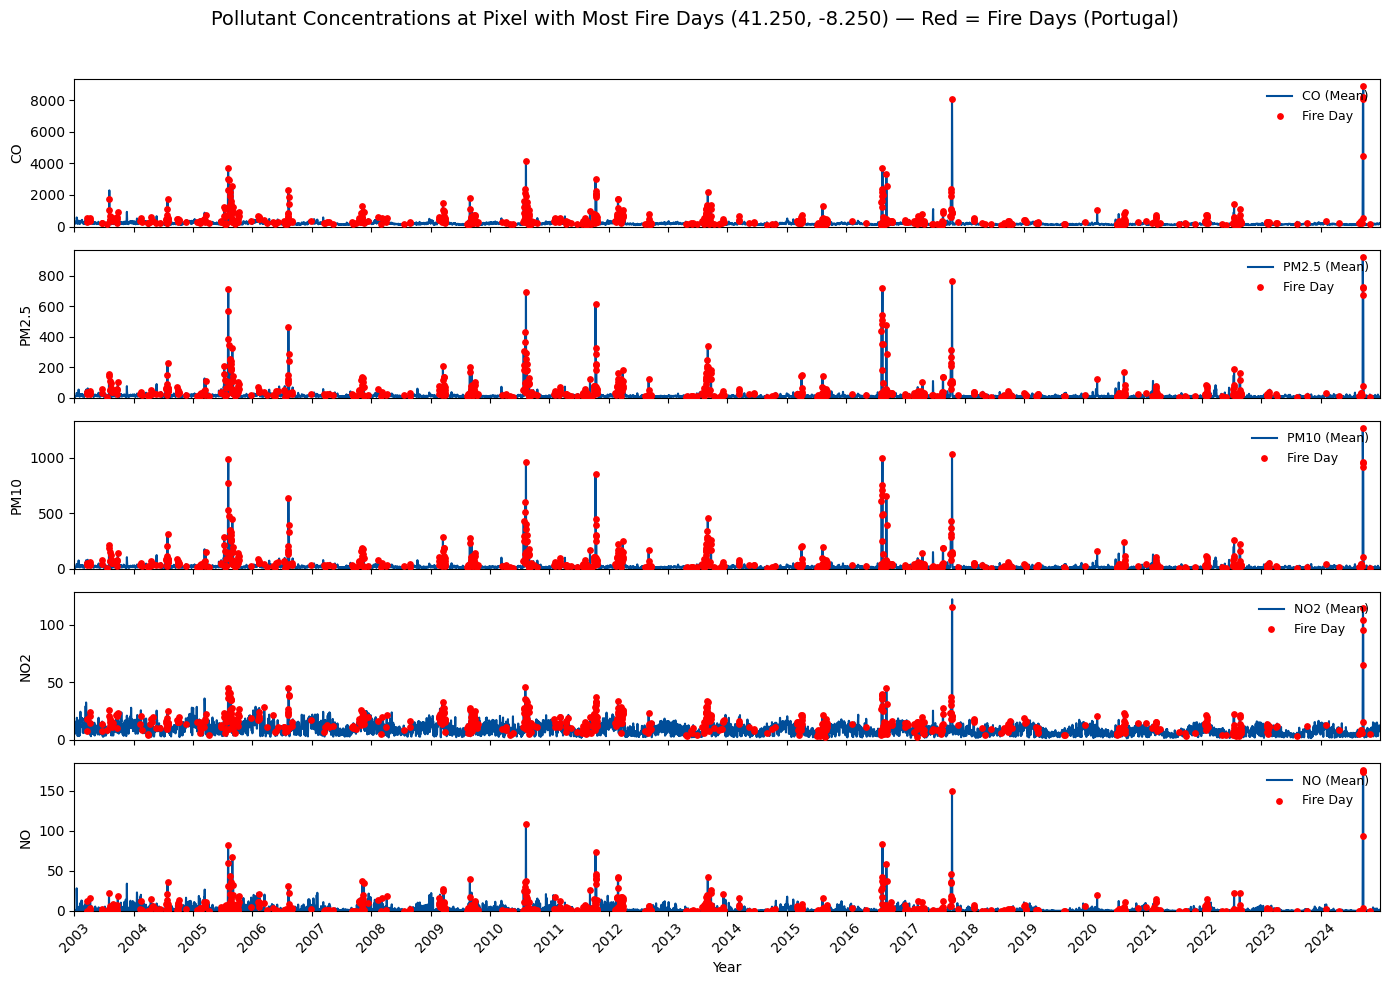

In [50]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Portugal.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Portugal.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Portugal.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Portugal.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Portugal.nc"
}

# --- STEP 1: Find pixel with the most fire days ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Portugal"]  # lat x lon x time

# Count fire days per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: lat x lon

# Find pixel with maximum fire days
iy, ix = np.unravel_index(np.argmax(fire_counts.values), fire_counts.shape)
lat_val = float(ds_sample["latitude"].values[iy])
lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel with most fire days at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 2: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Portugal"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 3: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot pollutant line
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name} (Mean)",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(pol_name)
    ax.legend(loc="upper right", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)

    # X-axis yearly ticks
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel with Most Fire Days ({lat_val:.3f}, {lon_val:.3f}) — Red = Fire Days (Portugal)",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


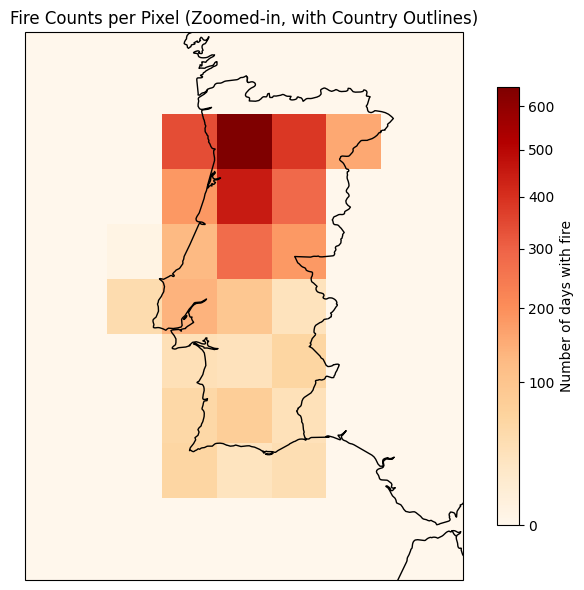

In [48]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

# --- INPUT FILE ---
file_path = r"D:\IPMA\CAMS\co_fire_Portugal.nc"

# Open dataset
ds = xr.open_dataset(file_path)
fire_mask = ds["fire_binary_Portugal"]  # lat x lon x time

# Sum along time to get fire counts per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: latitude x longitude

# Find pixels with at least one fire
fire_indices = np.argwhere(fire_counts.values > 0)

if len(fire_indices) == 0:
    raise ValueError("No fire pixels found!")

# Get bounding box of fire pixels
min_y, min_x = fire_indices.min(axis=0)
max_y, max_x = fire_indices.max(axis=0)

# Add a small margin (e.g., 2 pixels)
margin = 2
min_y = max(min_y - margin, 0)
min_x = max(min_x - margin, 0)
max_y = min(max_y + margin, fire_counts.shape[0]-1)
max_x = min(max_x + margin, fire_counts.shape[1]-1)

# Select the zoomed-in area
fire_zoom = fire_counts.isel(latitude=slice(min_y, max_y+1),
                             longitude=slice(min_x, max_x+1))
lat_zoom = ds["latitude"].isel(latitude=slice(min_y, max_y+1))
lon_zoom = ds["longitude"].isel(longitude=slice(min_x, max_x+1))

# --- PLOT WITH CARTOPY ---
plt.figure(figsize=(7, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# --- Define colormap ---
# We'll use a stronger sequential map (like OrRd) and keep NaNs white
cmap = plt.cm.OrRd.copy()
cmap.set_bad(color="white")

# Mask NaN values for plotting
data = np.ma.masked_invalid(fire_zoom.values)

# Optional: adjust color normalization to enhance contrast
norm = mcolors.PowerNorm(gamma=0.6, vmin=0, vmax=float(np.nanmax(data)))

# Plot fire counts
pcm = ax.pcolormesh(lon_zoom, lat_zoom, data, cmap=cmap, norm=norm, shading='auto')

# Add only borders and coastlines (both black, same width)
ax.add_feature(cfeature.BORDERS, linewidth=1.0, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=1.0, edgecolor="black")

# Set limits to zoom area
ax.set_extent([float(lon_zoom.min()), float(lon_zoom.max()),
               float(lat_zoom.min()), float(lat_zoom.max())],
              crs=ccrs.PlateCarree())

# Add colorbar and labels
plt.colorbar(pcm, ax=ax, label="Number of days with fire", shrink=0.8)
ax.set_title("Fire Counts per Pixel (Zoomed-in, with Country Outlines)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


In [2]:
import xarray as xr
import pandas as pd
import numpy as np

files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Italy.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Italy.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Italy.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Italy.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Italy.nc"
}

fire_results = []
nofire_results = []
fire_ranges = []
nofire_ranges = []
fire_counts = []
nofire_counts = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    pollutant = ds["Mean"]
    fire_flag = ds["fire_binary_Italy"]

    # Convert CO units
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = xr.Dataset({"pollutant": pollutant, "fire": fire_flag}).to_dataframe().reset_index()

    # --- FIRE DAYS ---
    df_fire = df[df["fire"] == 1].copy()
    df_fire_daily = (
        df_fire.groupby(df_fire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_fire_mean","pixel_count"]))
        .reset_index()
    )
    df_fire_daily["pollutant"] = pol_name
    fire_results.append(df_fire_daily)

    # Quartiles for fire days
    values = df_fire_daily["pollutant_fire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_fire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_fire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_fire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        fire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        fire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

    # --- NON-FIRE DAYS ---
    df_nofire = df[df["fire"] == 0].copy()
    df_nofire_daily = (
        df_nofire.groupby(df_nofire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_nofire_mean","pixel_count"]))
        .reset_index()
    )
    df_nofire_daily["pollutant"] = pol_name
    nofire_results.append(df_nofire_daily)

    # Quartiles for non-fire days
    values = df_nofire_daily["pollutant_nofire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_nofire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_nofire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_nofire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        nofire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        nofire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

# --- Combine results ---
fire_days_table = pd.concat(fire_results, ignore_index=True)
nofire_days_table = pd.concat(nofire_results, ignore_index=True)

fire_ranges_table = pd.DataFrame(fire_ranges)
nofire_ranges_table = pd.DataFrame(nofire_ranges)

fire_counts_table = pd.concat(fire_counts, ignore_index=True)
nofire_counts_table = pd.concat(nofire_counts, ignore_index=True)

print("\nFire days quartile ranges:")
print(fire_ranges_table)
print("\nNon-fire days quartile ranges:")
print(nofire_ranges_table)

print("\nFire days counts & percentages:")
print(fire_counts_table)
print("\nNon-fire days counts & percentages:")
print(nofire_counts_table)



Fire days quartile ranges:
  pollutant         min      Q1_cut      median      Q3_cut          max
0        CO  104.324758  155.944086  187.315612  238.667185  1263.977073
1     PM2.5    0.112157    9.175309   13.827742   20.742627   168.981193
2      PM10    0.213340   13.147116   19.750781   29.103967   237.304443
3       NO2    0.408984    4.000867    6.822248   10.684817    44.618905
4        NO    0.019623    0.165399    0.329950    0.846355    77.868684

Non-fire days quartile ranges:
  pollutant         min      Q1_cut      median      Q3_cut         max
0        CO  118.462302  176.376531  208.684938  259.593209  571.495006
1     PM2.5    3.509969   10.416339   13.470428   17.741813   65.550824
2      PM10    5.261541   14.979502   19.183497   25.144293   84.677088
3       NO2    2.666766    7.068279    9.037292   11.651976   24.449468
4        NO    0.075712    0.582060    1.224258    2.846164   24.942879

Fire days counts & percentages:
   quartile  count pollutant  percent

Selected pixel with most fire days at latitude=37.500, longitude=12.750


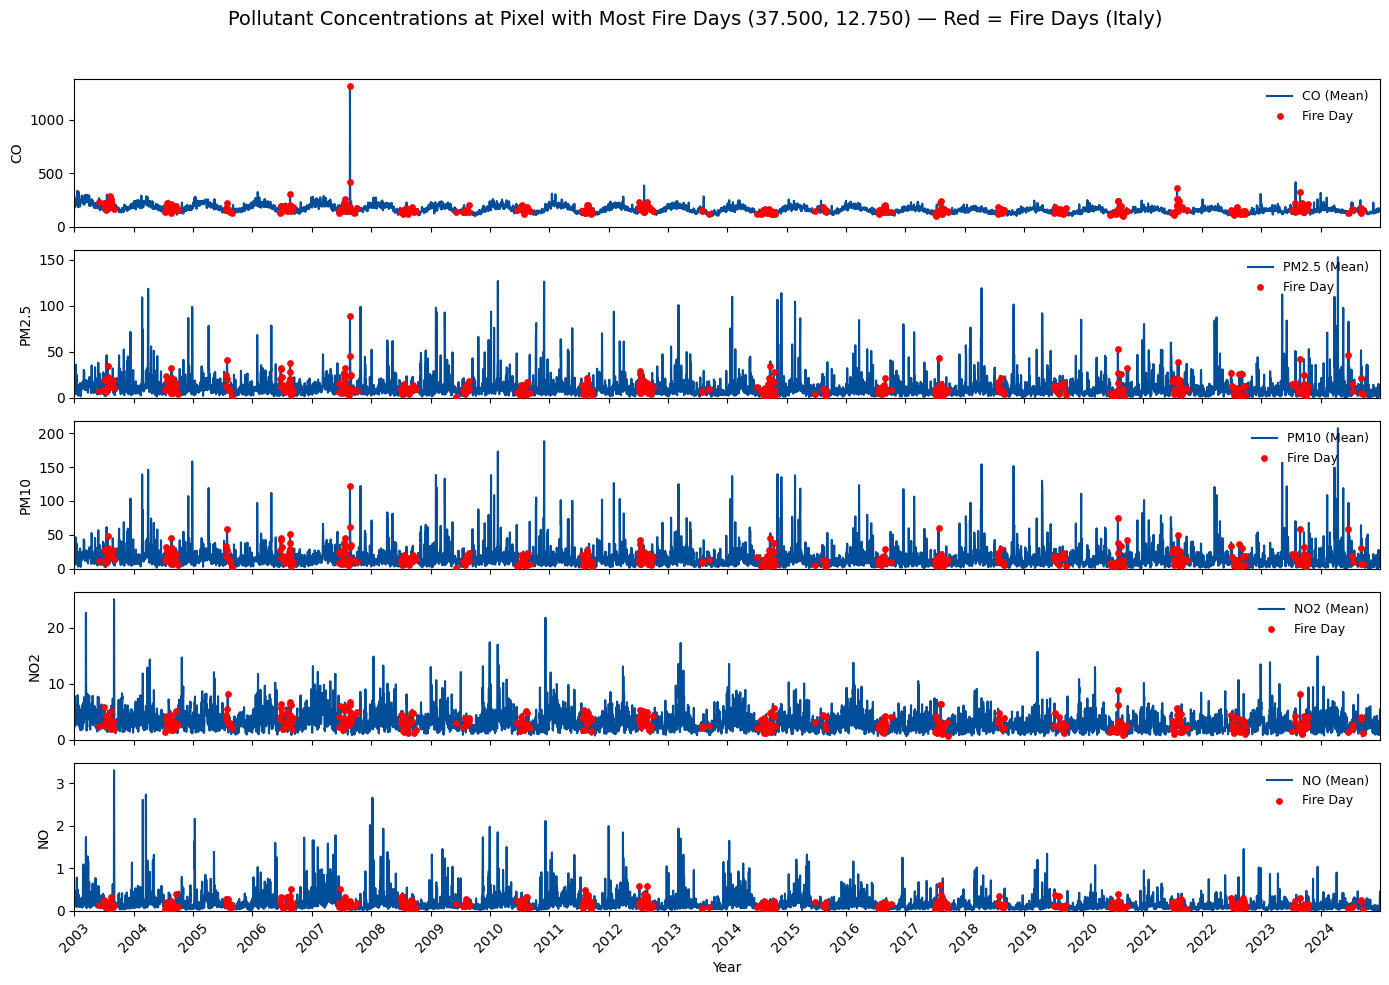

In [51]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Italy.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Italy.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Italy.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Italy.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Italy.nc"
}

# --- STEP 1: Find pixel with the most fire days ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Italy"]  # lat x lon x time

# Count fire days per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: lat x lon

# Find pixel with maximum fire days
iy, ix = np.unravel_index(np.argmax(fire_counts.values), fire_counts.shape)
lat_val = float(ds_sample["latitude"].values[iy])
lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel with most fire days at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 2: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Italy"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 3: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot pollutant line
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name} (Mean)",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(pol_name)
    ax.legend(loc="upper right", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)

    # X-axis yearly ticks
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel with Most Fire Days ({lat_val:.3f}, {lon_val:.3f}) — Red = Fire Days (Italy)",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


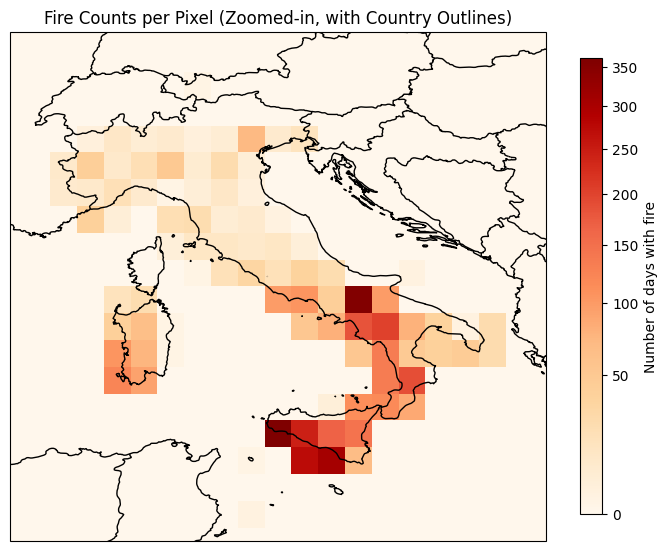

In [41]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

# --- INPUT FILE ---
file_path = r"D:\IPMA\CAMS\co_fire_Italy.nc"

# Open dataset
ds = xr.open_dataset(file_path)
fire_mask = ds["fire_binary_Italy"]  # lat x lon x time

# Sum along time to get fire counts per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: latitude x longitude

# Find pixels with at least one fire
fire_indices = np.argwhere(fire_counts.values > 0)

if len(fire_indices) == 0:
    raise ValueError("No fire pixels found!")

# Get bounding box of fire pixels
min_y, min_x = fire_indices.min(axis=0)
max_y, max_x = fire_indices.max(axis=0)

# Add a small margin (e.g., 2 pixels)
margin = 2
min_y = max(min_y - margin, 0)
min_x = max(min_x - margin, 0)
max_y = min(max_y + margin, fire_counts.shape[0]-1)
max_x = min(max_x + margin, fire_counts.shape[1]-1)

# Select the zoomed-in area
fire_zoom = fire_counts.isel(latitude=slice(min_y, max_y+1),
                             longitude=slice(min_x, max_x+1))
lat_zoom = ds["latitude"].isel(latitude=slice(min_y, max_y+1))
lon_zoom = ds["longitude"].isel(longitude=slice(min_x, max_x+1))

# --- PLOT WITH CARTOPY ---
plt.figure(figsize=(7, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# --- Define colormap ---
# We'll use a stronger sequential map (like OrRd) and keep NaNs white
cmap = plt.cm.OrRd.copy()
cmap.set_bad(color="white")

# Mask NaN values for plotting
data = np.ma.masked_invalid(fire_zoom.values)

# Optional: adjust color normalization to enhance contrast
norm = mcolors.PowerNorm(gamma=0.6, vmin=0, vmax=float(np.nanmax(data)))

# Plot fire counts
pcm = ax.pcolormesh(lon_zoom, lat_zoom, data, cmap=cmap, norm=norm, shading='auto')

# Add only borders and coastlines (both black, same width)
ax.add_feature(cfeature.BORDERS, linewidth=1.0, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=1.0, edgecolor="black")

# Set limits to zoom area
ax.set_extent([float(lon_zoom.min()), float(lon_zoom.max()),
               float(lat_zoom.min()), float(lat_zoom.max())],
              crs=ccrs.PlateCarree())

# Add colorbar and labels
plt.colorbar(pcm, ax=ax, label="Number of days with fire", shrink=0.8)
ax.set_title("Fire Counts per Pixel (Zoomed-in, with Country Outlines)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


In [3]:
import xarray as xr
import pandas as pd
import numpy as np

files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Greece.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Greece.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Greece.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Greece.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Greece.nc"
}

fire_results = []
nofire_results = []
fire_ranges = []
nofire_ranges = []
fire_counts = []
nofire_counts = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    pollutant = ds["Mean"]
    fire_flag = ds["fire_binary_Greece"]

    # Convert CO units
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = xr.Dataset({"pollutant": pollutant, "fire": fire_flag}).to_dataframe().reset_index()

    # --- FIRE DAYS ---
    df_fire = df[df["fire"] == 1].copy()
    df_fire_daily = (
        df_fire.groupby(df_fire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_fire_mean","pixel_count"]))
        .reset_index()
    )
    df_fire_daily["pollutant"] = pol_name
    fire_results.append(df_fire_daily)

    # Quartiles for fire days
    values = df_fire_daily["pollutant_fire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_fire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_fire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_fire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        fire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        fire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

    # --- NON-FIRE DAYS ---
    df_nofire = df[df["fire"] == 0].copy()
    df_nofire_daily = (
        df_nofire.groupby(df_nofire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_nofire_mean","pixel_count"]))
        .reset_index()
    )
    df_nofire_daily["pollutant"] = pol_name
    nofire_results.append(df_nofire_daily)

    # Quartiles for non-fire days
    values = df_nofire_daily["pollutant_nofire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_nofire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_nofire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_nofire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        nofire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        nofire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

# --- Combine results ---
fire_days_table = pd.concat(fire_results, ignore_index=True)
nofire_days_table = pd.concat(nofire_results, ignore_index=True)

fire_ranges_table = pd.DataFrame(fire_ranges)
nofire_ranges_table = pd.DataFrame(nofire_ranges)

fire_counts_table = pd.concat(fire_counts, ignore_index=True)
nofire_counts_table = pd.concat(nofire_counts, ignore_index=True)

print("\nFire days quartile ranges:")
print(fire_ranges_table)
print("\nNon-fire days quartile ranges:")
print(nofire_ranges_table)

print("\nFire days counts & percentages:")
print(fire_counts_table)
print("\nNon-fire days counts & percentages:")
print(nofire_counts_table)



Fire days quartile ranges:
  pollutant         min      Q1_cut      median      Q3_cut          max
0        CO  100.131964  164.717975  197.501197  248.504299  7014.863797
1     PM2.5    0.178621    9.968379   14.676985   21.846085   583.687717
2      PM10    0.249634   13.977567   20.540713   30.429758   781.713908
3       NO2    0.326040    3.158598    6.123831   10.907623    94.105034
4        NO    0.007587    0.106439    0.247242    0.956303   155.044650

Non-fire days quartile ranges:
  pollutant         min      Q1_cut      median      Q3_cut         max
0        CO  108.212757  155.479401  174.008595  199.646956  832.200378
1     PM2.5    0.788244    8.005333   10.765755   14.316851  136.456497
2      PM10    1.143472   11.462330   15.281285   20.201884  190.624863
3       NO2    1.140573    3.042641    3.904628    5.083060   14.865463
4        NO    0.040150    0.150855    0.300552    0.635029    5.818358

Fire days counts & percentages:
   quartile  count pollutant  percent

Selected pixel with most fire days at latitude=41.250, longitude=21.750


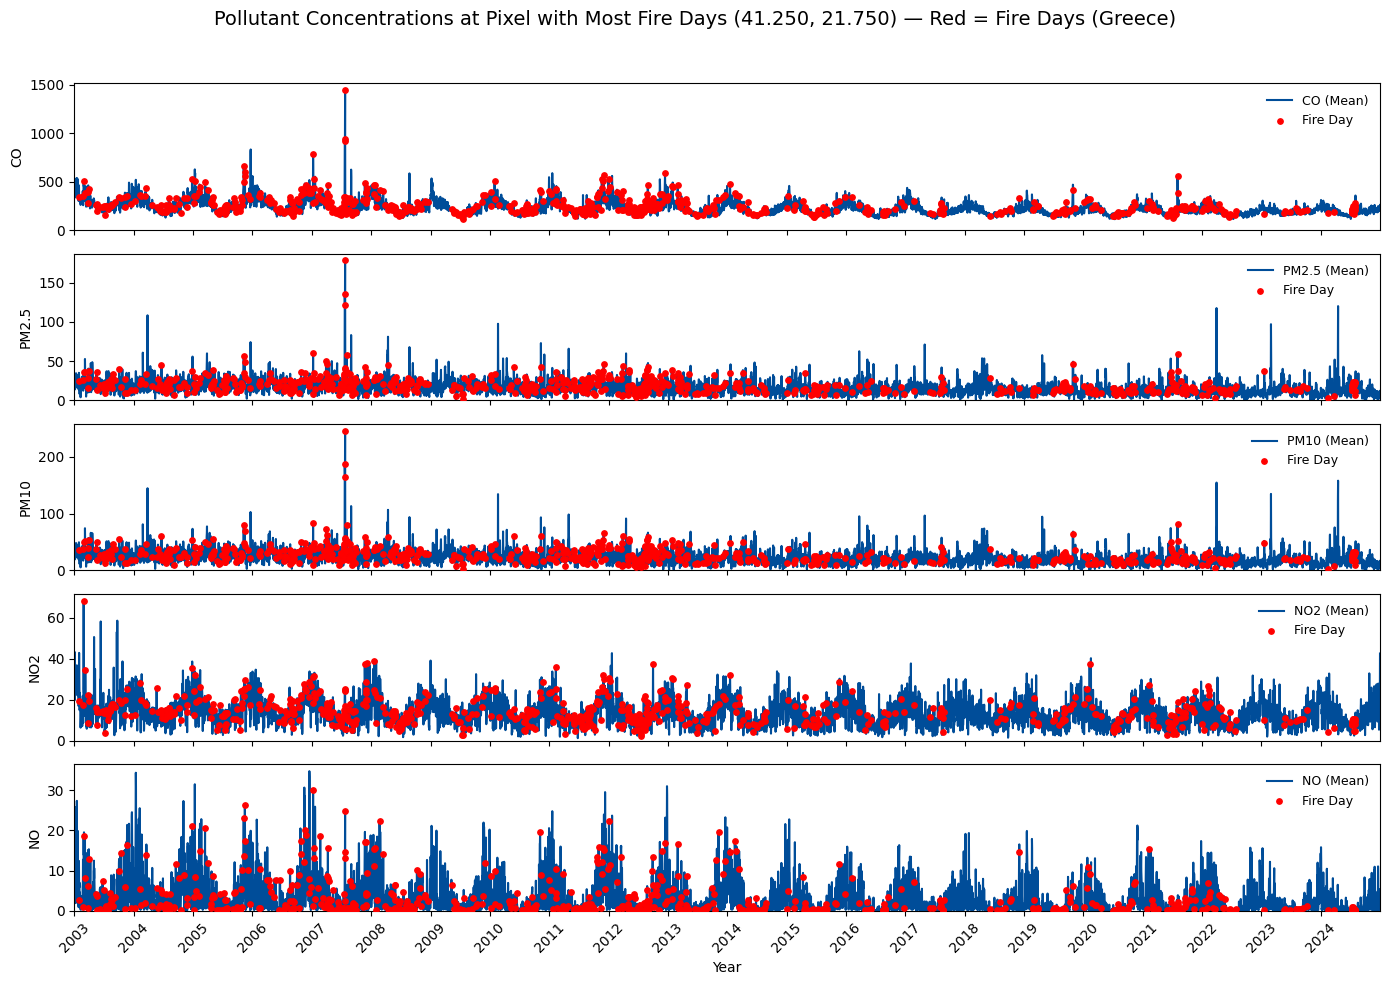

In [52]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Greece.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Greece.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Greece.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Greece.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Greece.nc"
}

# --- STEP 1: Find pixel with the most fire days ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Greece"]  # lat x lon x time

# Count fire days per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: lat x lon

# Find pixel with maximum fire days
iy, ix = np.unravel_index(np.argmax(fire_counts.values), fire_counts.shape)
lat_val = float(ds_sample["latitude"].values[iy])
lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel with most fire days at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 2: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Greece"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 3: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot pollutant line
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name} (Mean)",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(pol_name)
    ax.legend(loc="upper right", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)

    # X-axis yearly ticks
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel with Most Fire Days ({lat_val:.3f}, {lon_val:.3f}) — Red = Fire Days (Greece)",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


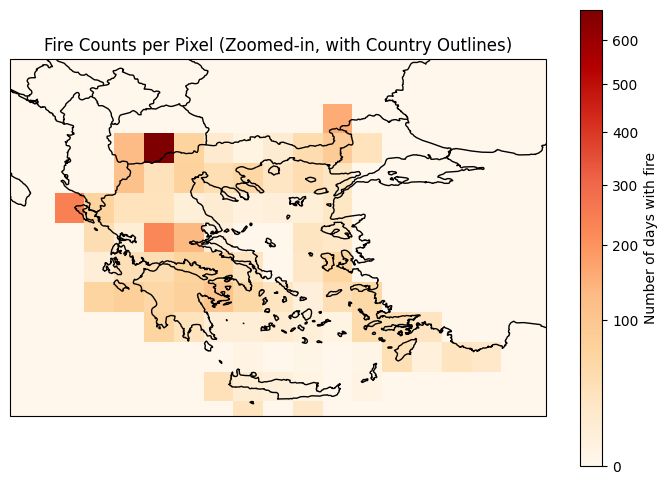

In [42]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

# --- INPUT FILE ---
file_path = r"D:\IPMA\CAMS\co_fire_Greece.nc"

# Open dataset
ds = xr.open_dataset(file_path)
fire_mask = ds["fire_binary_Greece"]  # lat x lon x time

# Sum along time to get fire counts per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: latitude x longitude

# Find pixels with at least one fire
fire_indices = np.argwhere(fire_counts.values > 0)

if len(fire_indices) == 0:
    raise ValueError("No fire pixels found!")

# Get bounding box of fire pixels
min_y, min_x = fire_indices.min(axis=0)
max_y, max_x = fire_indices.max(axis=0)

# Add a small margin (e.g., 2 pixels)
margin = 2
min_y = max(min_y - margin, 0)
min_x = max(min_x - margin, 0)
max_y = min(max_y + margin, fire_counts.shape[0]-1)
max_x = min(max_x + margin, fire_counts.shape[1]-1)

# Select the zoomed-in area
fire_zoom = fire_counts.isel(latitude=slice(min_y, max_y+1),
                             longitude=slice(min_x, max_x+1))
lat_zoom = ds["latitude"].isel(latitude=slice(min_y, max_y+1))
lon_zoom = ds["longitude"].isel(longitude=slice(min_x, max_x+1))

# --- PLOT WITH CARTOPY ---
plt.figure(figsize=(7, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# --- Define colormap ---
# We'll use a stronger sequential map (like OrRd) and keep NaNs white
cmap = plt.cm.OrRd.copy()
cmap.set_bad(color="white")

# Mask NaN values for plotting
data = np.ma.masked_invalid(fire_zoom.values)

# Optional: adjust color normalization to enhance contrast
norm = mcolors.PowerNorm(gamma=0.6, vmin=0, vmax=float(np.nanmax(data)))

# Plot fire counts
pcm = ax.pcolormesh(lon_zoom, lat_zoom, data, cmap=cmap, norm=norm, shading='auto')

# Add only borders and coastlines (both black, same width)
ax.add_feature(cfeature.BORDERS, linewidth=1.0, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=1.0, edgecolor="black")

# Set limits to zoom area
ax.set_extent([float(lon_zoom.min()), float(lon_zoom.max()),
               float(lat_zoom.min()), float(lat_zoom.max())],
              crs=ccrs.PlateCarree())

# Add colorbar and labels
plt.colorbar(pcm, ax=ax, label="Number of days with fire", shrink=0.8)
ax.set_title("Fire Counts per Pixel (Zoomed-in, with Country Outlines)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


In [4]:
import xarray as xr
import pandas as pd
import numpy as np

files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Spain.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Spain.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Spain.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Spain.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Spain.nc"
}

fire_results = []
nofire_results = []
fire_ranges = []
nofire_ranges = []
fire_counts = []
nofire_counts = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    pollutant = ds["Mean"]
    fire_flag = ds["fire_binary_Spain"]

    # Convert CO units
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = xr.Dataset({"pollutant": pollutant, "fire": fire_flag}).to_dataframe().reset_index()

    # --- FIRE DAYS ---
    df_fire = df[df["fire"] == 1].copy()
    df_fire_daily = (
        df_fire.groupby(df_fire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_fire_mean","pixel_count"]))
        .reset_index()
    )
    df_fire_daily["pollutant"] = pol_name
    fire_results.append(df_fire_daily)

    # Quartiles for fire days
    values = df_fire_daily["pollutant_fire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_fire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_fire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_fire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        fire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        fire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

    # --- NON-FIRE DAYS ---
    df_nofire = df[df["fire"] == 0].copy()
    df_nofire_daily = (
        df_nofire.groupby(df_nofire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_nofire_mean","pixel_count"]))
        .reset_index()
    )
    df_nofire_daily["pollutant"] = pol_name
    nofire_results.append(df_nofire_daily)

    # Quartiles for non-fire days
    values = df_nofire_daily["pollutant_nofire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_nofire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_nofire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_nofire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        nofire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        nofire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

# --- Combine results ---
fire_days_table = pd.concat(fire_results, ignore_index=True)
nofire_days_table = pd.concat(nofire_results, ignore_index=True)

fire_ranges_table = pd.DataFrame(fire_ranges)
nofire_ranges_table = pd.DataFrame(nofire_ranges)

fire_counts_table = pd.concat(fire_counts, ignore_index=True)
nofire_counts_table = pd.concat(nofire_counts, ignore_index=True)

print("\nFire days quartile ranges:")
print(fire_ranges_table)
print("\nNon-fire days quartile ranges:")
print(nofire_ranges_table)

print("\nFire days counts & percentages:")
print(fire_counts_table)
print("\nNon-fire days counts & percentages:")
print(nofire_counts_table)



Fire days quartile ranges:
  pollutant        min      Q1_cut      median      Q3_cut          max
0        CO  87.836192  155.936416  202.287439  294.528603  7987.803115
1     PM2.5   1.033568    8.876236   14.642410   26.098120   714.536468
2      PM10   1.472035   12.715223   20.591426   36.500962   985.934567
3       NO2   0.285172    4.923815    7.990631   12.346320    65.252311
4        NO   0.019482    0.214687    0.500822    2.148763   213.958214

Non-fire days quartile ranges:
  pollutant        min      Q1_cut      median      Q3_cut         max
0        CO  97.030085  146.767654  170.192185  202.671048  440.381860
1     PM2.5   2.245757    7.146325    9.329687   12.494731   73.506646
2      PM10   3.429071   10.554788   13.589190   17.800433   92.609943
3       NO2   1.797235    4.633263    6.098844    8.364016   19.760695
4        NO   0.055706    0.264315    0.516651    1.214280   11.444273

Fire days counts & percentages:
   quartile  count pollutant  percentage
0       

Selected pixel with most fire days at latitude=42.000, longitude=-7.500


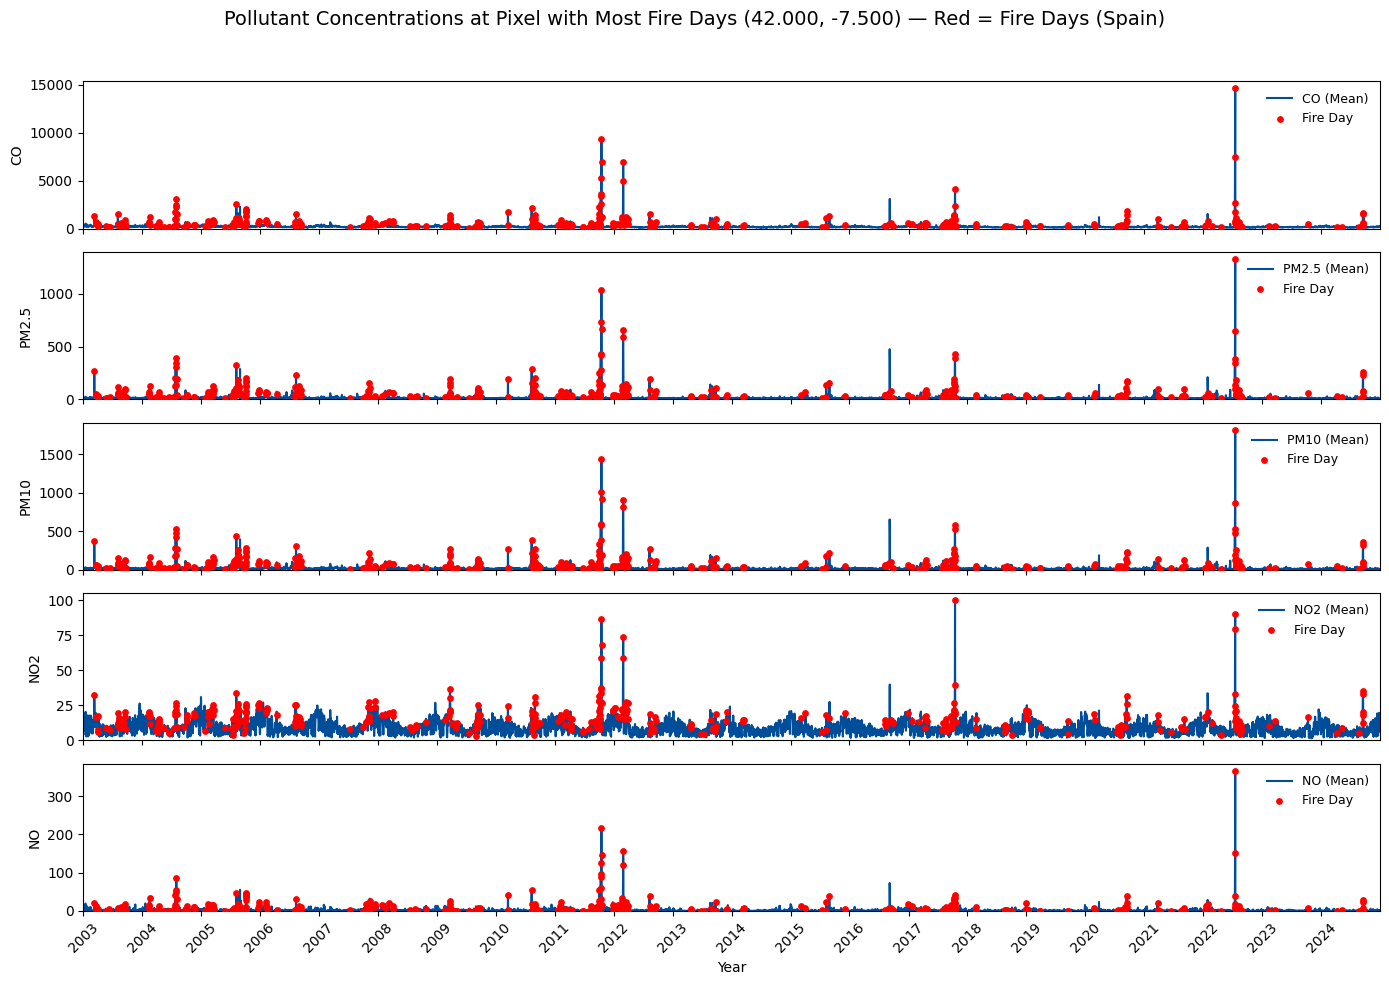

In [53]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Spain.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Spain.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Spain.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Spain.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Spain.nc"
}

# --- STEP 1: Find pixel with the most fire days ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Spain"]  # lat x lon x time

# Count fire days per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: lat x lon

# Find pixel with maximum fire days
iy, ix = np.unravel_index(np.argmax(fire_counts.values), fire_counts.shape)
lat_val = float(ds_sample["latitude"].values[iy])
lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel with most fire days at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 2: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Spain"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 3: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot pollutant line
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name} (Mean)",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(pol_name)
    ax.legend(loc="upper right", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)

    # X-axis yearly ticks
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel with Most Fire Days ({lat_val:.3f}, {lon_val:.3f}) — Red = Fire Days (Spain)",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


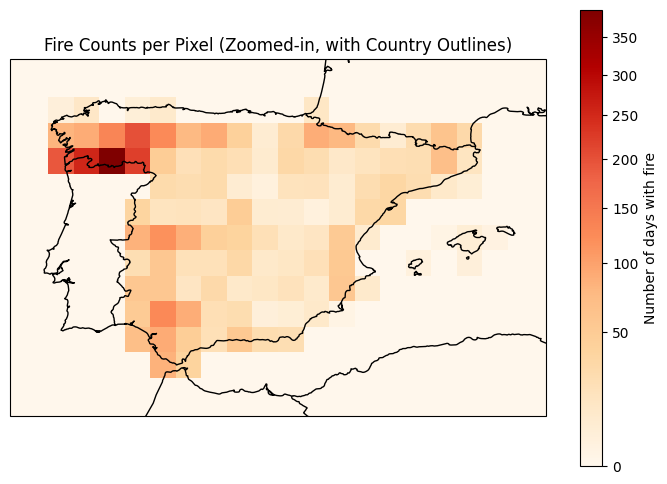

In [43]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

# --- INPUT FILE ---
file_path = r"D:\IPMA\CAMS\co_fire_Spain.nc"

# Open dataset
ds = xr.open_dataset(file_path)
fire_mask = ds["fire_binary_Spain"]  # lat x lon x time

# Sum along time to get fire counts per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: latitude x longitude

# Find pixels with at least one fire
fire_indices = np.argwhere(fire_counts.values > 0)

if len(fire_indices) == 0:
    raise ValueError("No fire pixels found!")

# Get bounding box of fire pixels
min_y, min_x = fire_indices.min(axis=0)
max_y, max_x = fire_indices.max(axis=0)

# Add a small margin (e.g., 2 pixels)
margin = 2
min_y = max(min_y - margin, 0)
min_x = max(min_x - margin, 0)
max_y = min(max_y + margin, fire_counts.shape[0]-1)
max_x = min(max_x + margin, fire_counts.shape[1]-1)

# Select the zoomed-in area
fire_zoom = fire_counts.isel(latitude=slice(min_y, max_y+1),
                             longitude=slice(min_x, max_x+1))
lat_zoom = ds["latitude"].isel(latitude=slice(min_y, max_y+1))
lon_zoom = ds["longitude"].isel(longitude=slice(min_x, max_x+1))

# --- PLOT WITH CARTOPY ---
plt.figure(figsize=(7, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# --- Define colormap ---
# We'll use a stronger sequential map (like OrRd) and keep NaNs white
cmap = plt.cm.OrRd.copy()
cmap.set_bad(color="white")

# Mask NaN values for plotting
data = np.ma.masked_invalid(fire_zoom.values)

# Optional: adjust color normalization to enhance contrast
norm = mcolors.PowerNorm(gamma=0.6, vmin=0, vmax=float(np.nanmax(data)))

# Plot fire counts
pcm = ax.pcolormesh(lon_zoom, lat_zoom, data, cmap=cmap, norm=norm, shading='auto')

# Add only borders and coastlines (both black, same width)
ax.add_feature(cfeature.BORDERS, linewidth=1.0, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=1.0, edgecolor="black")

# Set limits to zoom area
ax.set_extent([float(lon_zoom.min()), float(lon_zoom.max()),
               float(lat_zoom.min()), float(lat_zoom.max())],
              crs=ccrs.PlateCarree())

# Add colorbar and labels
plt.colorbar(pcm, ax=ax, label="Number of days with fire", shrink=0.8)
ax.set_title("Fire Counts per Pixel (Zoomed-in, with Country Outlines)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


Pearson correlation performed between meteorological variables and air pollutants, for all days and every label established

Understanding the p-values

Null hypothesis (H₀): There is no correlation between the variables.

Alternative hypothesis (H₁): There is a correlation.

p-value: Probability of observing the correlation (or more extreme) if H₀ is true.

Interpretation rule of thumb:

p < 0.05 → significant: reject the null → correlation is likely real.

p ≥ 0.05 → not significant: cannot reject the null → correlation might be due to chance.

..................................

How to read weak vs strong correlations

|r| < 0.1 → negligible

0.1 ≤ |r| < 0.3 → weak

0.3 ≤ |r| < 0.5 → moderate

|r| ≥ 0.5 → strong

CONVERT UNITS FOR CO

Wind speed

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files (same as before)
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Portugal.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Portugal.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Portugal.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Portugal.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Portugal.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Wind speed dataset (multiple yearly files)
# --------------------
wind_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\UV_wind\daily_wind_speed_stats_yearly_regridded\daily_wind_speed_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in wind_files]
ds_wind = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_wind = ds_wind.stack(date=("Year", "Month", "Day"))

# Build datetime index from stacked coordinates
time_index = pd.to_datetime(
    {"year": ds_wind["Year"].values, 
     "month": ds_wind["Month"].values, 
     "day": ds_wind["Day"].values},
    errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_wind = ds_wind.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_wind = ds_wind.assign_coords(time=("date", time_index))
ds_wind = ds_wind.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean wind speed
wind_ts = ds_wind["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind_Speed"

# --------------------
# 3. Prepare FireLabel masks (same as before)
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_label_Portugal"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Wind_Speed"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Wind_Speed"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Wind_Speed"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Save results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_wind_correlations_by_fire_label_Portugal.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


In [ ]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_wind["Year"].values
months = ds_wind["Month"].values
days = ds_wind["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + wind speed)
wind_ts = ds_wind["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "WindSpeed"

df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["WindSpeed"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")


In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Italy.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Italy.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Italy.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Italy.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Italy.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Wind speed dataset (multiple yearly files)
# --------------------
wind_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\UV_wind\daily_wind_speed_stats_yearly_regridded\daily_wind_speed_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in wind_files]
ds_wind = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_wind = ds_wind.stack(date=("Year", "Month", "Day"))

# Build datetime index from stacked coordinates
time_index = pd.to_datetime(
    {"year": ds_wind["Year"].values, 
     "month": ds_wind["Month"].values, 
     "day": ds_wind["Day"].values},
    errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_wind = ds_wind.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_wind = ds_wind.assign_coords(time=("date", time_index))
ds_wind = ds_wind.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean wind speed
wind_ts = ds_wind["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind_Speed"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Italy"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["WindSpeed"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["WindSpeed"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + wind)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["WindSpeed"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_wind_correlations_by_fire_label_Italy.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


In [ ]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_wind["Year"].values
months = ds_wind["Month"].values
days = ds_wind["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + wind speed)
wind_ts = ds_wind["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "WindSpeed"

df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["WindSpeed"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")


In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Spain.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Spain.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Spain.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Spain.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Spain.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Wind speed dataset (multiple yearly files)
# --------------------
wind_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\UV_wind\daily_wind_speed_stats_yearly_regridded\daily_wind_speed_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in wind_files]
ds_wind = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_wind = ds_wind.stack(date=("Year", "Month", "Day"))

# Build datetime index from stacked coordinates
time_index = pd.to_datetime(
    {"year": ds_wind["Year"].values, 
     "month": ds_wind["Month"].values, 
     "day": ds_wind["Day"].values},
    errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_wind = ds_wind.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_wind = ds_wind.assign_coords(time=("date", time_index))
ds_wind = ds_wind.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean wind speed
wind_ts = ds_wind["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind_Speed"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Spain"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["WindSpeed"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["WindSpeed"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + wind)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["WindSpeed"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_wind_correlations_by_fire_label_Spain.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


In [ ]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_wind["Year"].values
months = ds_wind["Month"].values
days = ds_wind["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + wind speed)
wind_ts = ds_wind["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "WindSpeed"

df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["WindSpeed"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")


In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Greece.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Greece.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Greece.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Greece.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Greece.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Wind speed dataset (multiple yearly files)
# --------------------
wind_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\UV_wind\daily_wind_speed_stats_yearly_regridded\daily_wind_speed_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in wind_files]
ds_wind = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_wind = ds_wind.stack(date=("Year", "Month", "Day"))

# Build datetime index from stacked coordinates
time_index = pd.to_datetime(
    {"year": ds_wind["Year"].values, 
     "month": ds_wind["Month"].values, 
     "day": ds_wind["Day"].values},
    errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_wind = ds_wind.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_wind = ds_wind.assign_coords(time=("date", time_index))
ds_wind = ds_wind.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean wind speed
wind_ts = ds_wind["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind_Speed"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Greece"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["WindSpeed"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["WindSpeed"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + wind)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["WindSpeed"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_wind_correlations_by_fire_label_Greece.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


In [ ]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_wind["Year"].values
months = ds_wind["Month"].values
days = ds_wind["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + wind speed)
wind_ts = ds_wind["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "WindSpeed"

df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["WindSpeed"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")


Total Precipitation

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Portugal.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Portugal.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Portugal.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Portugal.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Portugal.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Precipitation dataset (multiple yearly files)
# --------------------
precip_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Precipitation\daily_precipitation_stats_yearly_regridded\daily_precipitation_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in precip_files]
ds_precip = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_precip = ds_precip.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_precip = ds_precip.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_precip = ds_precip.assign_coords(time=("date", time_index))
ds_precip = ds_precip.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean of total precipitation
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_label_Portugal"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Precipitation"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Precipitation"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Save results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_precipitation_correlations_by_fire_label_Portugal.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


In [ ]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + precipitation)
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")


In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Italy.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Italy.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Italy.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Italy.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Italy.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels


# --------------------
# 2. Precipitation dataset (multiple yearly files)
# --------------------
precip_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Precipitation\daily_precipitation_stats_yearly_regridded\daily_precipitation_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in precip_files]
ds_precip = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_precip = ds_precip.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_precip = ds_precip.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_precip = ds_precip.assign_coords(time=("date", time_index))
ds_precip = ds_precip.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean of total precipitation
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Italy"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Precipitation"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Precipitation"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + precipitation)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_precipitation_correlations_by_fire_label_Italy.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


In [ ]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + precipitation)
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")


In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Spain.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Spain.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Spain.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Spain.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Spain.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Precipitation dataset (multiple yearly files)
# --------------------
precip_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Precipitation\daily_precipitation_stats_yearly_regridded\daily_precipitation_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in precip_files]
ds_precip = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_precip = ds_precip.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_precip = ds_precip.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_precip = ds_precip.assign_coords(time=("date", time_index))
ds_precip = ds_precip.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean of total precipitation
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Spain"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Precipitation"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Precipitation"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + precipitation)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_precipitation_correlations_by_fire_label_Spain.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


In [ ]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + precipitation)
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")


In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Greece.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Greece.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Greece.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Greece.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Greece.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Precipitation dataset (multiple yearly files)
# --------------------
precip_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Precipitation\daily_precipitation_stats_yearly_regridded\daily_precipitation_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in precip_files]
ds_precip = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_precip = ds_precip.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_precip = ds_precip.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_precip = ds_precip.assign_coords(time=("date", time_index))
ds_precip = ds_precip.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean of total precipitation
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Greece"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Precipitation"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Precipitation"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + precipitation)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_precipitation_correlations_by_fire_label_Greece.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


In [ ]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + precipitation)
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")


Temperature

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files (same as before)
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Portugal.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Portugal.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Portugal.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Portugal.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Portugal.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Temperature dataset (multiple yearly files)
# --------------------
temp_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Temperature\daily_temperature_stats_yearly_regridded\daily_temperature_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in temp_files]
ds_temp = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_temp = ds_temp.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_temp = ds_temp.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_temp = ds_temp.assign_coords(time=("date", time_index))
ds_temp = ds_temp.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean temperature
temp_ts = ds_temp["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

# --------------------
# 3. Prepare FireLabel masks (same as precipitation script)
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_label_Portugal"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Temperature"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Temperature"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Save results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_temperature_correlations_by_fire_label_Portugal.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


In [ ]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + temperature)
temp_ts = ds_temp["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")


In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Italy.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Italy.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Italy.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Italy.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Italy.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Temperature dataset (multiple yearly files)
# --------------------
temp_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Temperature\daily_temperature_stats_yearly_regridded\daily_temperature_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in temp_files]
ds_temp = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_temp = ds_temp.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_temp = ds_temp.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_temp = ds_temp.assign_coords(time=("date", time_index))
ds_temp = ds_temp.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean temperature
temp_ts = ds_temp["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Italy"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Temperature"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Temperature"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build combined DataFrame (pollutants + temperature)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_temperature_correlations_by_fire_label_Italy.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


In [ ]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + temperature)
temp_ts = ds_temp["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")


In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Spain.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Spain.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Spain.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Spain.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Spain.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Temperature dataset (multiple yearly files)
# --------------------
temp_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Temperature\daily_temperature_stats_yearly_regridded\daily_temperature_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in temp_files]
ds_temp = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_temp = ds_temp.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_temp = ds_temp.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_temp = ds_temp.assign_coords(time=("date", time_index))
ds_temp = ds_temp.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean temperature
temp_ts = ds_temp["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Spain"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Temperature"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Temperature"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build combined DataFrame (pollutants + temperature)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_temperature_correlations_by_fire_label_Spain.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


In [ ]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + temperature)
temp_ts = ds_temp["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")


In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    "CO": r"D:\IPMA\CAMS\co_fire_Greece.nc",
    "PM2.5": r"D:\IPMA\CAMS\pm2p5_fire_Greece.nc",
    "PM10": r"D:\IPMA\CAMS\pm10_fire_Greece.nc",
    "NO2": r"D:\IPMA\CAMS\no2_fire_Greece.nc",
    "NO": r"D:\IPMA\CAMS\no_fire_Greece.nc"
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Temperature dataset (multiple yearly files)
# --------------------
temp_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Temperature\daily_temperature_stats_yearly_regridded\daily_temperature_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in temp_files]
ds_temp = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_temp = ds_temp.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_temp = ds_temp.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_temp = ds_temp.assign_coords(time=("date", time_index))
ds_temp = ds_temp.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean temperature
temp_ts = ds_temp["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Greece"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Temperature"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Temperature"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build combined DataFrame (pollutants + temperature)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\CAMS\pollutant_temperature_correlations_by_fire_label_Greece.csv", index=False)
print("Correlation results saved to CSV.")
print(results_df.to_string(index=False))


In [ ]:
# --------------------
# Print invalid dates removed
# --------------------
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

invalid_dates = time_index[pd.isna(time_index)]
if len(invalid_dates) > 0:
    print("Invalid dates removed during datetime conversion:")
    for dt in invalid_dates:
        print(dt)
else:
    print("No invalid dates found.")

# --------------------
# Print number of days per fire label
# --------------------
# Build df_all (pollutants + temperature)
temp_ts = ds_temp["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])

print("\nNumber of days per fire label:")
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    
    # Days before dropping NaNs
    days_before = mask_aligned.sum()
    
    # Days after dropping NaNs
    days_after = mask_aligned[mask_aligned & df_all.notna().all(axis=1)].sum()
    
    print(f"Fire Label {label}: Before drop NaN = {days_before}, After drop NaN = {days_after}")
